In [41]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import rasterio as rio
from rasterio.plot import show
import matplotlib
import matplotlib.pyplot as plt
import math
# import earthpy as et
# import earthpy.spatial as es
# import earthpy.plot as ep




import glob
import os

# Import data/Test
Get help/tutorial from https://www.earthdatascience.org/courses/use-data-open-source-python/

### Import Landsat 8 data - VIS/NIR

In [20]:
path = "D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test"
data = sorted(glob.glob(path + "/*.TIF"))
data


['D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_QA_PIXEL.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_QA_RADSAT.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B1.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B2.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B3.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B4.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B5.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B6.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_B7.TIF',
 'D:/Nicolas_D/Geodaten/Masterarbeit/LS8_test\\LC08_L2SP_196025_20200919_20201006_02_T1_SR_QA

In [4]:
for i in range(2, 9):
    band_i = rxr.open_rasterio(data[i], masked = True).squeeze()
    band_corr = band_i*0.0000275-0.2
    globals()[f"band_{i-1}"] = band_corr


In [5]:
band_1.rio.nodata

In [6]:
band_1.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

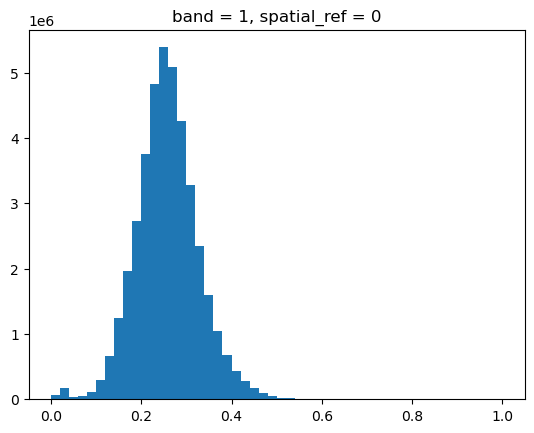

In [7]:
band_5.plot.hist(range=[0.0, 1.0], bins = 50)
plt.show()


In [8]:
print("Max:", np.nanmin(band_2.values))
print("Min:", np.nanmax(band_2.values))


Max: -0.19978
Min: 1.57485


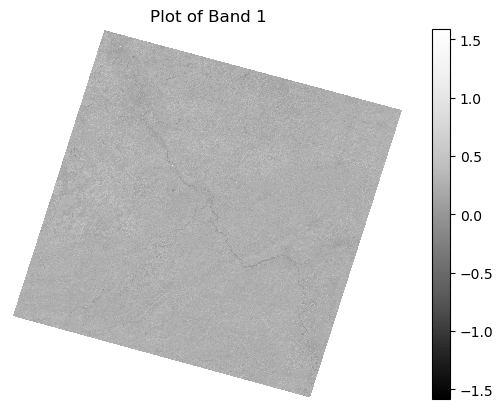

In [9]:
# Plot the data
f, ax=plt.subplots()
band_5.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\nicol\anaconda3\envs\ET_master_project\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


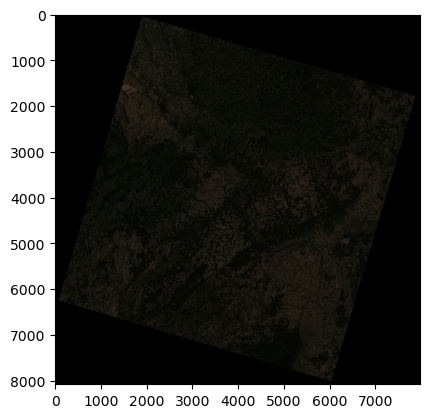

In [10]:
# Create RGB Plot
rgb = np.dstack((band_4, band_3, band_2))
plt.imshow(rgb)

### Import Landsat 8 data - Thermal

In [11]:
band_10 = rxr.open_rasterio(data[11], masked = True).squeeze()


In [12]:
band_10 = band_10*0.00341802+149

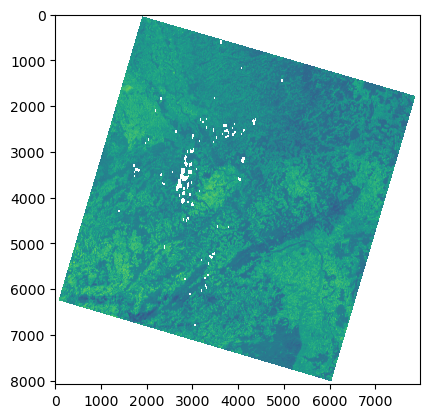

In [13]:
plt.imshow(band_10)

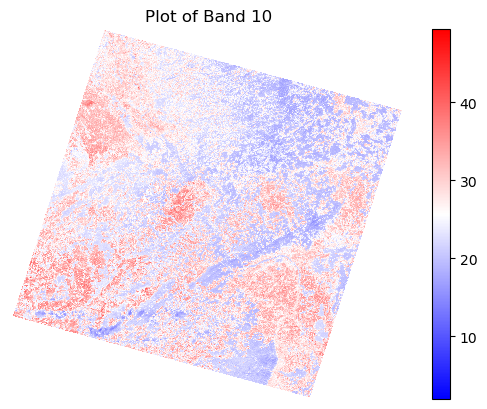

In [14]:
# T in Celsius
band_10_cels = band_10 - 273.15


# Colormap 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["b", "w", "r"], N=256) 




# Plot the data
f, ax=plt.subplots()
band_10_cels.plot.imshow(ax=ax,
                  cmap=cmap)
ax.set_axis_off()
ax.set_title("Plot of Band 10")
plt.show()

In [21]:
band_trad = rxr.open_rasterio(data[17], masked = True).squeeze()

In [22]:
band_trad = band_trad*0.001

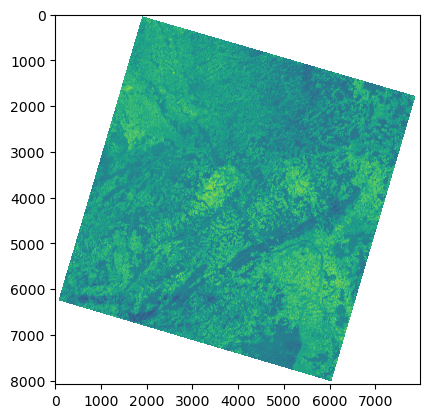

In [23]:
plt.imshow(band_trad)

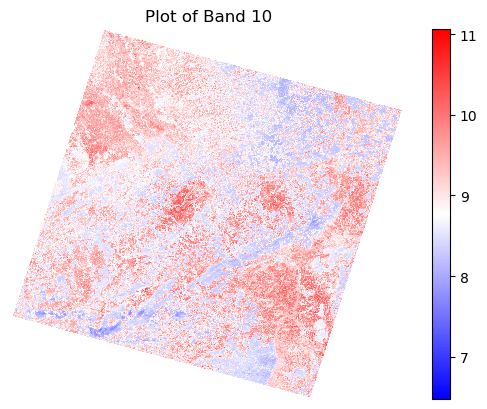

In [24]:
# Colormap 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["b", "w", "r"], N=256) 




# Plot the data
f, ax=plt.subplots()
band_trad.plot.imshow(ax=ax,
                  cmap=cmap)
ax.set_axis_off()
ax.set_title("Plot of Band 10")
plt.show()

# Processing Steps

## 1. Preprocessing

### 1. Satellite Data

### 2. Land Use Map

### 3. Meteorolocial Data

## 2. Surface Radiation Balance

### 2.1 NDVI, SAVI, LAI

In [52]:
# NDVI
NDVI = (band_5 - band_4) / (band_5 + band_4)

# SAVI
L_savi = 0.5       # Value should be adjusted according to Soil Moisture (0.1 and 0.5 are suggested)
SAVI = (1+L_savi)*(band_5 - band_4) / (L_savi+band_5 + band_4)


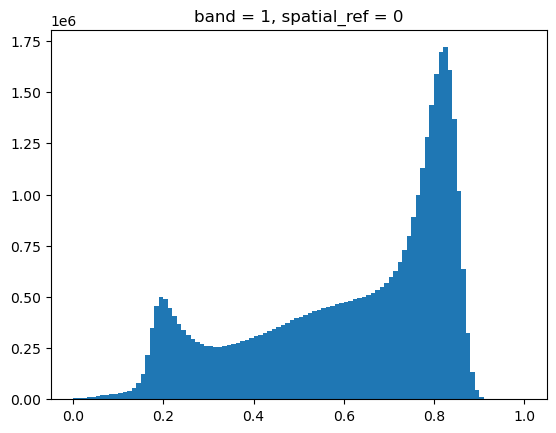

In [54]:
NDVI.plot.hist(range=[0.0, 1.0], bins = 100)
plt.show()

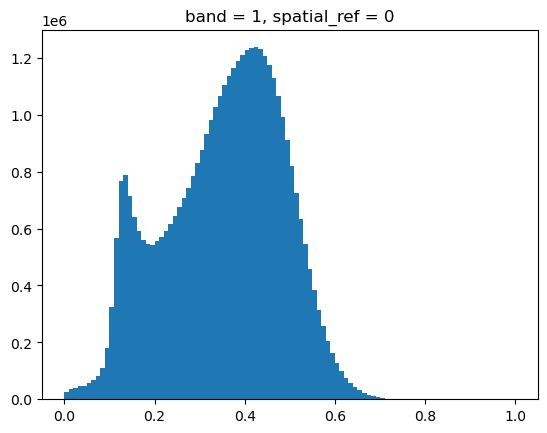

In [55]:
SAVI.plot.hist(range=[0.0, 1.0], bins = 100)
plt.show()

In [63]:
# LAI
LAI = -(np.log((0.69-SAVI)/0.59)/0.91) 


c:\Users\nicol\anaconda3\envs\ET_master_project\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


<xarray.DataArray (y: 8081, x: 7981)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int32 1
  * x            (x) float64 2.787e+05 2.787e+05 ... 5.181e+05 5.181e+05
  * y            (y) float64 5.692e+06 5.692e+06 ... 5.449e+06 5.449e+06
    spatial_ref  int32 0

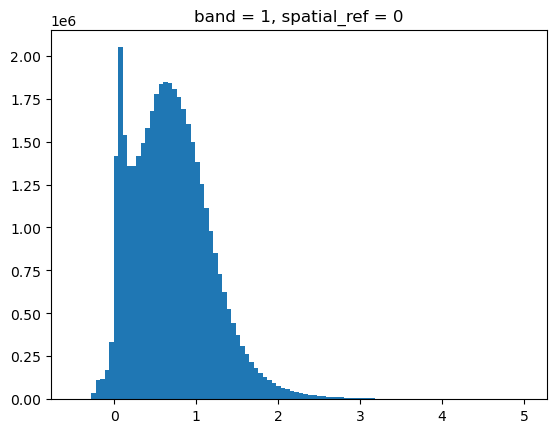

In [77]:
LAI.plot.hist(range=[-0.5, 5.0], bins = 100)
plt.show()

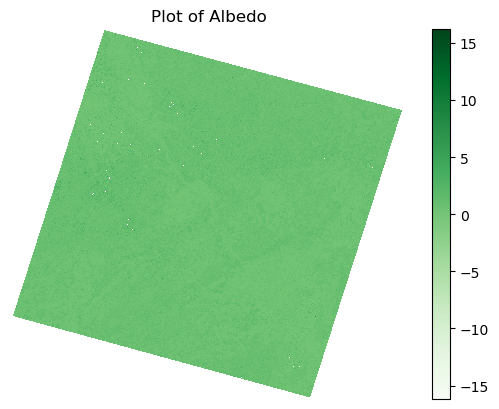

In [75]:
# Plot the data
f, ax=plt.subplots()
LAI.plot.imshow(ax=ax,
                  cmap = "Greens")
ax.set_axis_off()
ax.set_title("Plot of Albedo")
plt.show()

### 2.2 Albedo
First Test Calculation from LS8 Reflectances based on https://yceo.yale.edu/how-convert-landsat-dns-albedo
Caution: intended for TOA, but here used with BOA-Reflectances

In [25]:
B1 = band_2     # Blue
B2 = band_4     # Red
B3 = band_5     # NIR 1 (0.76-0.9)
B4 = band_6     # NIR 2 (1.55-1.75)
B5 = band_7     # MIR (2.08-2.35)


albedo = ((0.356*B1) + (0.130*B2) + (0.373*B3) + (0.085*B4) + (0.072*B5) -0.018) / 1.016

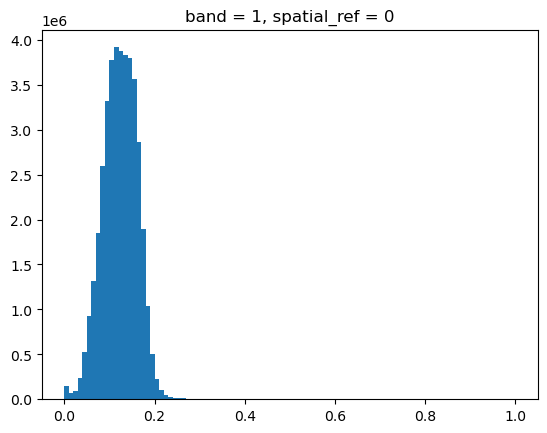

In [36]:
albedo.plot.hist(range=[0.0, 1.0], bins = 100)
plt.show()

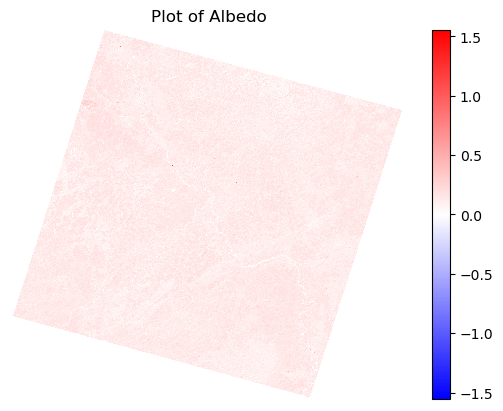

In [37]:
# Plot the data
f, ax=plt.subplots()
albedo.plot.imshow(ax=ax,
                  cmap = cmap)
ax.set_axis_off()
ax.set_title("Plot of Albedo")
plt.show()

### 2.3 Rs - Incoming Shortwave Radiation

In [49]:
# RS_incoming in W/m²

Gsc = 1367                  # Solar Constant in W/m²

# Solar Incidence Angle 
sun_elev = 39.24065277      # Sun elevation angle in degree, from Metadata_file
solar_inc = 90-sun_elev     # Solar Incidence Angle

# dr
DOY = 263                   # DOY of 19. September 2020
dr = 1+0.033*math.cos(DOY*(2*math.pi/365))  # dr derived from earth-sun-distance 

# Atmospheric transmissivity
z = 104     # elevation above sea level (m) for Station (here: Bad Kreuznach elevation)     
tau_sw = 0.75+2*10**-5*z

# RS_incoming in W/m² (should be between 200 and 1000)
RS_in = Gsc * math.cos(solar_inc) * dr * tau_sw
RS_in

899.7472321021972

### 2.4 RL - Outgoing Longwave Radiation

Surface Emissivity (C, 2.), Thermal Radiance (C, 3.), Surface Temperature (C, 4.) are not needed at the moment because we already got Surface Temperature from Landsat Level 2


In [86]:
print("Max LAI:", np.nanmax(LAI.values))

Max LAI: 16.177588


In [79]:
# emis_null: Emissivity of thermal emission for broad thermal spectrum (6 to 14 mikrometer)

if LAI < 3:
    emis_null = 0.95 + 0.01*LAI
else: 
    emis_null = 0.98

low_LAI = LAI.where(LAI < 3)
high_LAI = LAI.where(LAI >= 3)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [91]:
emis_null = [[]]
if LAI < 3:
    emis_null = 0.95 + 0.01*LAI
else: 
    emis_null = 0.98
emis_null = np.asarray(emis_null)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [81]:
emis_null = 0.95 + 0.01*LAI
emis_null

<xarray.DataArray (y: 8081, x: 7981)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int32 1
  * x            (x) float64 2.787e+05 2.787e+05 ... 5.181e+05 5.181e+05
  * y            (y) float64 5.692e+06 5.692e+06 ... 5.449e+06 5.449e+06
    spatial_ref  int32 0

In [ ]:
RL_out = emis_null * sigma * Ts**4
RL_out

### 2.5 RL - Incoming Longwave Radiation

### 2.6 Solving vor Rn

## 3. Surface Energy Balance

### 3.1 G - Soil Heat Flux

### 3.2 H - Sensible Heat Flux

### 3.3 ET - Latent Heat Flux